In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [2]:
X_train = np.load('../../Data/data.npy')

In [3]:
X_train[0]

array([2.61755903, 2.49389168])

In [4]:
X_train.size

400

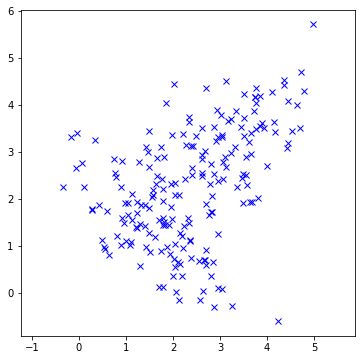

In [5]:
# vẽ hình
plt.figure(figsize=(6,6))
plt.plot(X_train[:,0], X_train[:,1], 'bx')
plt.axis('equal')
plt.show()

#### Quan sát ta thấy dữ liệu không phân cụm rõ ràng
#### => Dùng GMM để thực hiện việc phân cụm

In [6]:
# Select K components
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
list_sil = [] # chua danh sach cac gia tri sil
K = range(2,8) # chua danh sach cac k
for k in K:
    gmm = GaussianMixture(n_components=k) # 2, 3, 4...
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    # k = 2 => 0,1
    # k = 3 => 0, 1, 2
    sil = metrics.silhouette_score(X_train, labels, metric='euclidean')
    list_sil.append(sil)

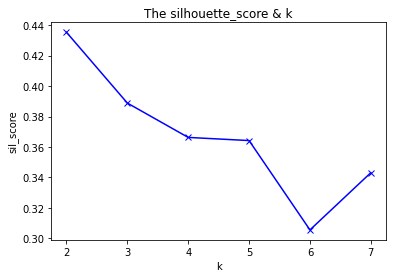

In [7]:
# Plot
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

In [8]:
# select components = 2
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

GaussianMixture(n_components=2)

## Sau khi model đã hội tụ, weights, means, và covariances cần phải được giải quyết. In các thông số này:

In [9]:
print(gmm.weights_)

[0.48114312 0.51885688]


In [10]:
print(gmm.means_)

[[1.60718016 1.35251723]
 [3.04641134 3.10654272]]


In [11]:
print(gmm.covariances_)

[[[ 0.74995307 -0.5010097 ]
  [-0.5010097   0.74377694]]

 [[ 0.83656079  0.37865596]
  [ 0.37865596  0.72727426]]]


In [12]:
types = gmm.predict(X_train)

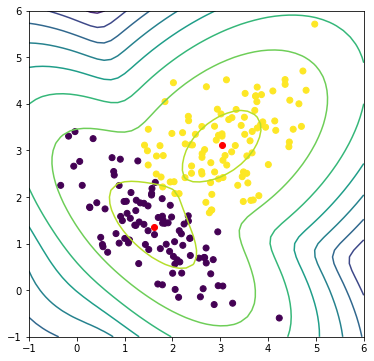

In [13]:
# plot mixture of Gaussians
plt.figure(figsize=(6,6))
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T # ma tran [[x,y]] ~ X_train
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=types) # 0, 1
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color="red")
plt.show()